Kaggle is a famous data science platform where beginners could actually learn how to explore data sets. For beginners, the most popular of these competitions is about predicting which passengers survived the sinking of the Titanic.

In this competition, we have a data set of different information about passengers onboard the Titanic, and we see if we can use this information to predict whether those people survived or not. Before we start looking at this, let's discuss how Kaggle competitions work. Each Kaggle competition has two key data files that we will work with - a training set and a testing set. The training set contains data we can use to train our model. It has a number of feature columns which contain various descriptive data, as well as a column of the target values we are trying to predict: in this case, Survival. 

We will see that the testing set contains all of the same feature columns, but is missing the target value column. Additionally, the testing set usually has fewer observations (rows) than the training set.


In [22]:
import pandas as pd

test = pd.read_csv("test.csv")
test_shape = test.shape
print("Test data set's shape: " + str(test_shape))

train = pd.read_csv("train.csv")
train_shape = train.shape
print("Train data set's shape:" + str(train_shape))

Test data set's shape: (418, 11)
Train data set's shape:(891, 12)


The file has a data dictionary, which explains the various columns that make up the data set. Below are the descriptions contained in that data dictionary:

* PassengerID - A column added by Kaggle to identify each row and make submissions easier
* Survived - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
* Pclass - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
* Sex - The passenger's sex
* Age - The passenger's age in years
* SibSp - The number of siblings or spouses the passenger had aboard the Titanic
* Parch - The number of parents or children the passenger had aboard the Titanic
* Ticket - The passenger's ticket number
* Fare - The fare the passenger paid
* Cabin - The passenger's cabin number
* Embarked - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

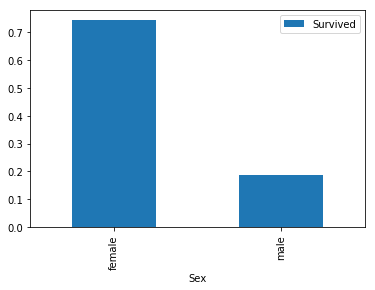

In [23]:
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

The type of machine learning we will be doing is called <b>classification</b>, because when we make predictions we are classifying each passenger as survived or not. More specifically, we are performing binary classification, which means that there are only two different states we are classifying.

In any machine learning exercise, thinking about the topic we are predicting is very important. We call this step acquiring domain knowledge, and it's one of the most important determinants for success in machine learning.

In this case, understanding the Titanic disaster and specifically what variables might affect the outcome of survival is important. Anyone who has watched the movie Titanic would remember that women and children were given preference to lifeboats (as they were in real life). We could also remember the vast class disparity of the passengers.

This indicates that <b>Age, Sex, and PClass</b> may be good predictors of survival. We'll start by exploring Sex and Pclass by visualizing the data.

Because the Survived column contains 0 if the passenger did not survive and 1 if they did, we can segment our data by sex and calculate the mean of this column. We can use DataFrame.pivot_table() to easily do this:


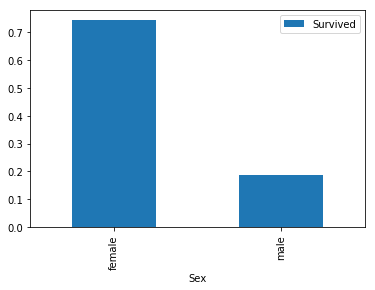

In [24]:
import matplotlib.pyplot as plt

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

Let's do the same with PClass to see if it is a good predictor of survival.

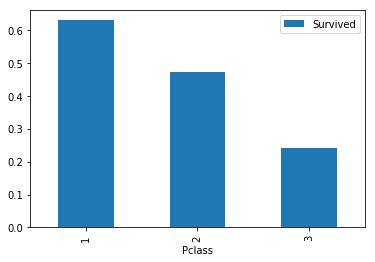

In [25]:
pclass_pivot = train.pivot_table(index="Pclass",values="Survived")
pclass_pivot.plot.bar()
plt.show()

The Sex and PClass columns are what we call <b>categorical features</b>. That means that the values represented a few separate options (for instance, whether the passenger was male or female, class divided among 1, 2, 3). Let's take a look at the Age column using Series.describe().

In [26]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The Age column contains numbers ranging from 0.42 to 80.0 (If we look at Kaggle's data page, it informs us that Age is fractional if the passenger is less than one). The other thing to note here is that there are <b>714 values in this column, fewer than the 891 rows</b> we discovered that the train data set had earlier in this mission which indicates we have some missing values.

All of this means that the Age column needs to be treated slightly differently, as this is a continuous numerical column. One way to look at distribution of values in a continuous numerical set is to use histograms. We can create two histograms to compare visually the those that survived vs those who died across different age ranges:




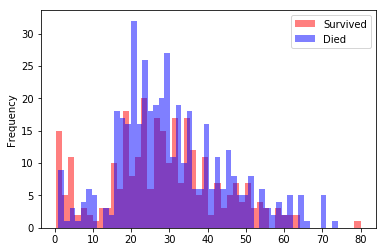

In [27]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

The relationship here is not simple, but we can see that in some age ranges more passengers survived - where the red bars are higher than the blue bars.

In order for this to be useful to our machine learning model, we can separate this continuous feature into a categorical feature by dividing it into ranges. We can use the pandas.cut() function to help us out.

The pandas.cut() function has two required parameters - the column we wish to cut, and a list of numbers which define the boundaries of our cuts. We are also going to use the optional parameter labels, which takes a list of labels for the resultant bins. This will make it easier for us to understand our results.

Before we modify this column, we have to be aware of two things. Firstly, any change we make to the train data, we also need to make to the test data, otherwise we will be unable to use our model to make predictions for our submissions. Secondly, we need to remember to handle the missing values we observed above.

In the example below, we create a function that:

* uses the pandas.fillna() method to fill all of the missing values with -0.5
* cuts the Age column into three segments: Missing, Child, and Adult using pandas.cut().

We then use that function on both the train and test dataframes.

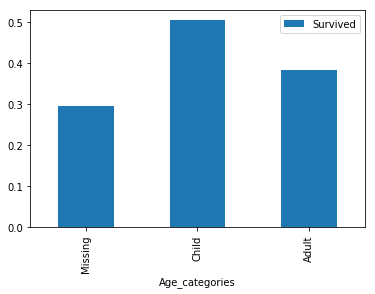

In [28]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,18,100]
label_names = ["Missing","Child","Adult"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

pivot = train.pivot_table(index="Age_categories",values="Survived")
pivot.plot.bar()
plt.show()


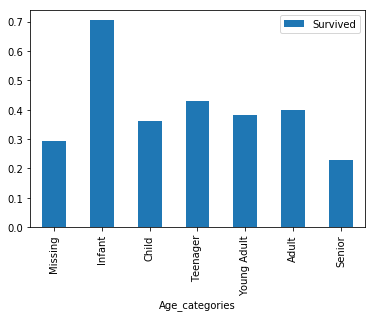

In [29]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", "Infant", "Child", "Teenager", "Young Adult", "Adult", "Senior"]

train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

pivot = train.pivot_table(index="Age_categories",values="Survived")
pivot.plot.bar()
plt.show()


So far we have identified three columns that may be useful for predicting survival:

* Sex
* Pclass
* Age, or more specifically our newly created Age_categories

Before we build our model, we need to prepare these columns for machine learning. Most machine learning algorithms can't understand text labels, so we have to convert our values into numbers. Additionally, we need to be careful that we don't imply any numeric relationship where there isn't one. If we think of the values in the Pclass column, we know they are 1, 2, and 3.

In [31]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

While the class of each passenger certainly has some sort of ordered relationship, the relationship between each class is not the same as the relationship between the numbers 1, 2, and 3. For instance, class 2 isn't "worth" double what class 1 is, and class 3 isn't "worth" triple what class 1 is.

In order to remove this relationship, we can create dummy columns for each unique value in Pclass. We can use the pandas.get_dummies() function to create dummy columns for the Pclass column and add it back to the original dataframe. We do this so as the relationship won't confuse us. It then applies that function the train and test dataframes. Let's also use this function to create dummy columns for both Sex and Age_categories columns.

In [ ]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train, "PClass")
test = create_dummies(test,"PClass")

train = create_dummies(train, "Sex")
test = create_dummies(test, "Sex")

train = create_dummies(train, "Age_categories")
test = create_dummies(test, "Age_categories")

Now that our data has been prepared, we are ready to train our first model. The first model we will use is called Logistic Regression, which is often the first model you will train when performing classification.

We will be using the scikit-learn library as it has many tools that make performing machine learning easier. The scikit-learn workflow consists of four main steps:

* Instantiate (or create) the specific machine learning model you want to use
* Fit the model to the training data
* Use the model to make predictions
* Evaluate the accuracy of the predictions

Each model in scikit-learn is implemented as a separate class and the first step is to identify the class we want to create an instance of. In our case, we want to use the LogisticRegression class.

We'll start by looking at the first two steps. First, we need to import the class:

In [ ]:
from sklearn.linear_model import LogisticRegression

Next, we create a LogisticRegression object:

In [ ]:
lr = LogisticRegression()

Lastly, we use the LogisticRegression.fit() method to train our model. The .fit() method accepts two arguments: X and y. X must be a two dimensional array (like a dataframe) of the features that we wish to train our model on, and y must be a one-dimensional array (like a series) of our target, or the column we wish to predict.

In [ ]:
columns = ['Pclass_2', 'Pclass_3', 'Sex_male']
lr.fit(train[columns], train['Survived'])

The code above fits (or trains) our LogisticRegression model using three columns: Pclass_2, Pclass_3, and Sex_male. Let's train our model using all of the columns we created previously. In the code below, we used LogisticRegression.fit() to fit the model on the train dataset using the following:
* The columns contained in columns as the first (X) parameter.
* The Survived column as the second y parameter

In [ ]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train[columns], train["Survived"])

With the code above, we have trained our first machine learning model. Our next step is to find out how accurate our model is, and to do that, we'll have to make some predictions. If we can recall from earlier, we do have a <b>test</b> dataframe that we could use to make predictions. We could make predictions on that data set, but because it does not have the <b>Survived</b> column we would have to submit it to Kaggle to find out our accuracy. This would be inefficient if we have to submit to find out the accuracy every time we optimized our model. 

We could also fit and predict on our train dataframe, however if we do this there is a high likelihood that our model will over fit, which means it will perform well because we're testing on the same data we've trained on, but then perform much worse on new, unseen data.

